In [1]:
!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

In [3]:
df = pd.read_csv('Dataset/wine-clustering.csv')
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [7]:
df.corr()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.072343   -0.368710  0.003911     -0.276769   0.066004   
Proline               0.643720   -0.192011  0.223626     -0.440597   0.393351   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.289101    0.236815             -0.155929   
Malic_Acid                -0.335167   -0.411007              0.292977   
Ash                        0.128980    0.115077              0.186230   
Ash_Alcanity              -0.321113   -0.351370              0.361922   
Magnesium                  0.214401    0.195784             -0.256294   
Total_Phenols              1.000000    0.864564             -0.449935   
Flavanoids                 0.864564    1.000000             -0.537900   
Nonflavanoid_Phenols      -0.449935   -0.537900              1.000000   
Proanthocyanins            0.612413    0.652692             -0.365845   
Color_Intensity           -0.055136   -0.172379              0.139057   
Hue                        0.433681    0.543479             -0.262640   
OD280                      0.699949    0.787194             -0.503270   
Proline                    0.498115    0.494193             -0.311385   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.136698         0.546364 -0.071747  0.072343   
Malic_Acid                  -0.220746         0.248985 -0.561296 -0.368710   
Ash                          0.009652         0.258887 -0.074667  0.003911   
Ash_Alcanity                -0.197327         0.018732 -0.273955 -0.276769   
Magnesium                    0.236441         0.199950  0.055398  0.066004   
Total_Phenols                0.612413        -0.055136  0.433681  0.699949   
Flavanoids                   0.652692        -0.172379  0.543479  0.787194   
Nonflavanoid_Phenols        -0.365845         0.139057 -0.262640 -0.503270   
Proanthocyanins              1.000000        -0.025250  0.295544  0.519067   
Color_Intensity             -0.025250         1.000000 -0.521813 -0.428815   
Hue                          0.295544        -0.521813  1.000000  0.565468   
OD280                        0.519067        -0.428815  0.565468  1.000000   
Proline                      0.330417         0.316100  0.236183  0.312761   

                       Proline  
Alcohol               0.643720  
Malic_Acid           -0.192011  
Ash                   0.223626  
Ash_Alcanity         -0.440597  
Magnesium             0.393351  
Total_Phenols         0.498115  
Flavanoids            0.494193  
Nonflavanoid_Phenols -0.311385  
Proanthocyanins       0.330417  
Color_Intensity       0.316100  
Hue                   0.236183  
OD280                 0.312761  
Proline               1.000000

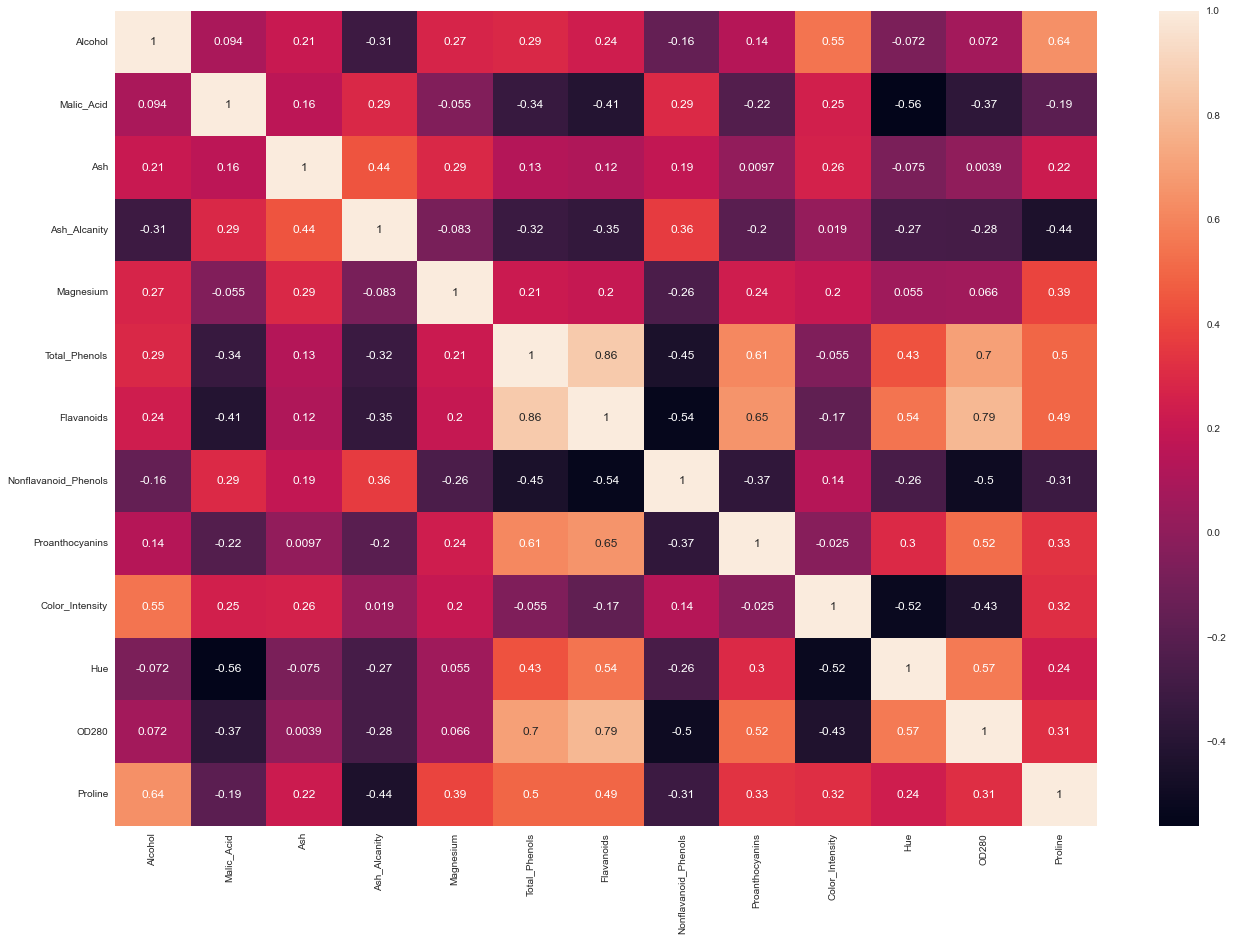

In [8]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

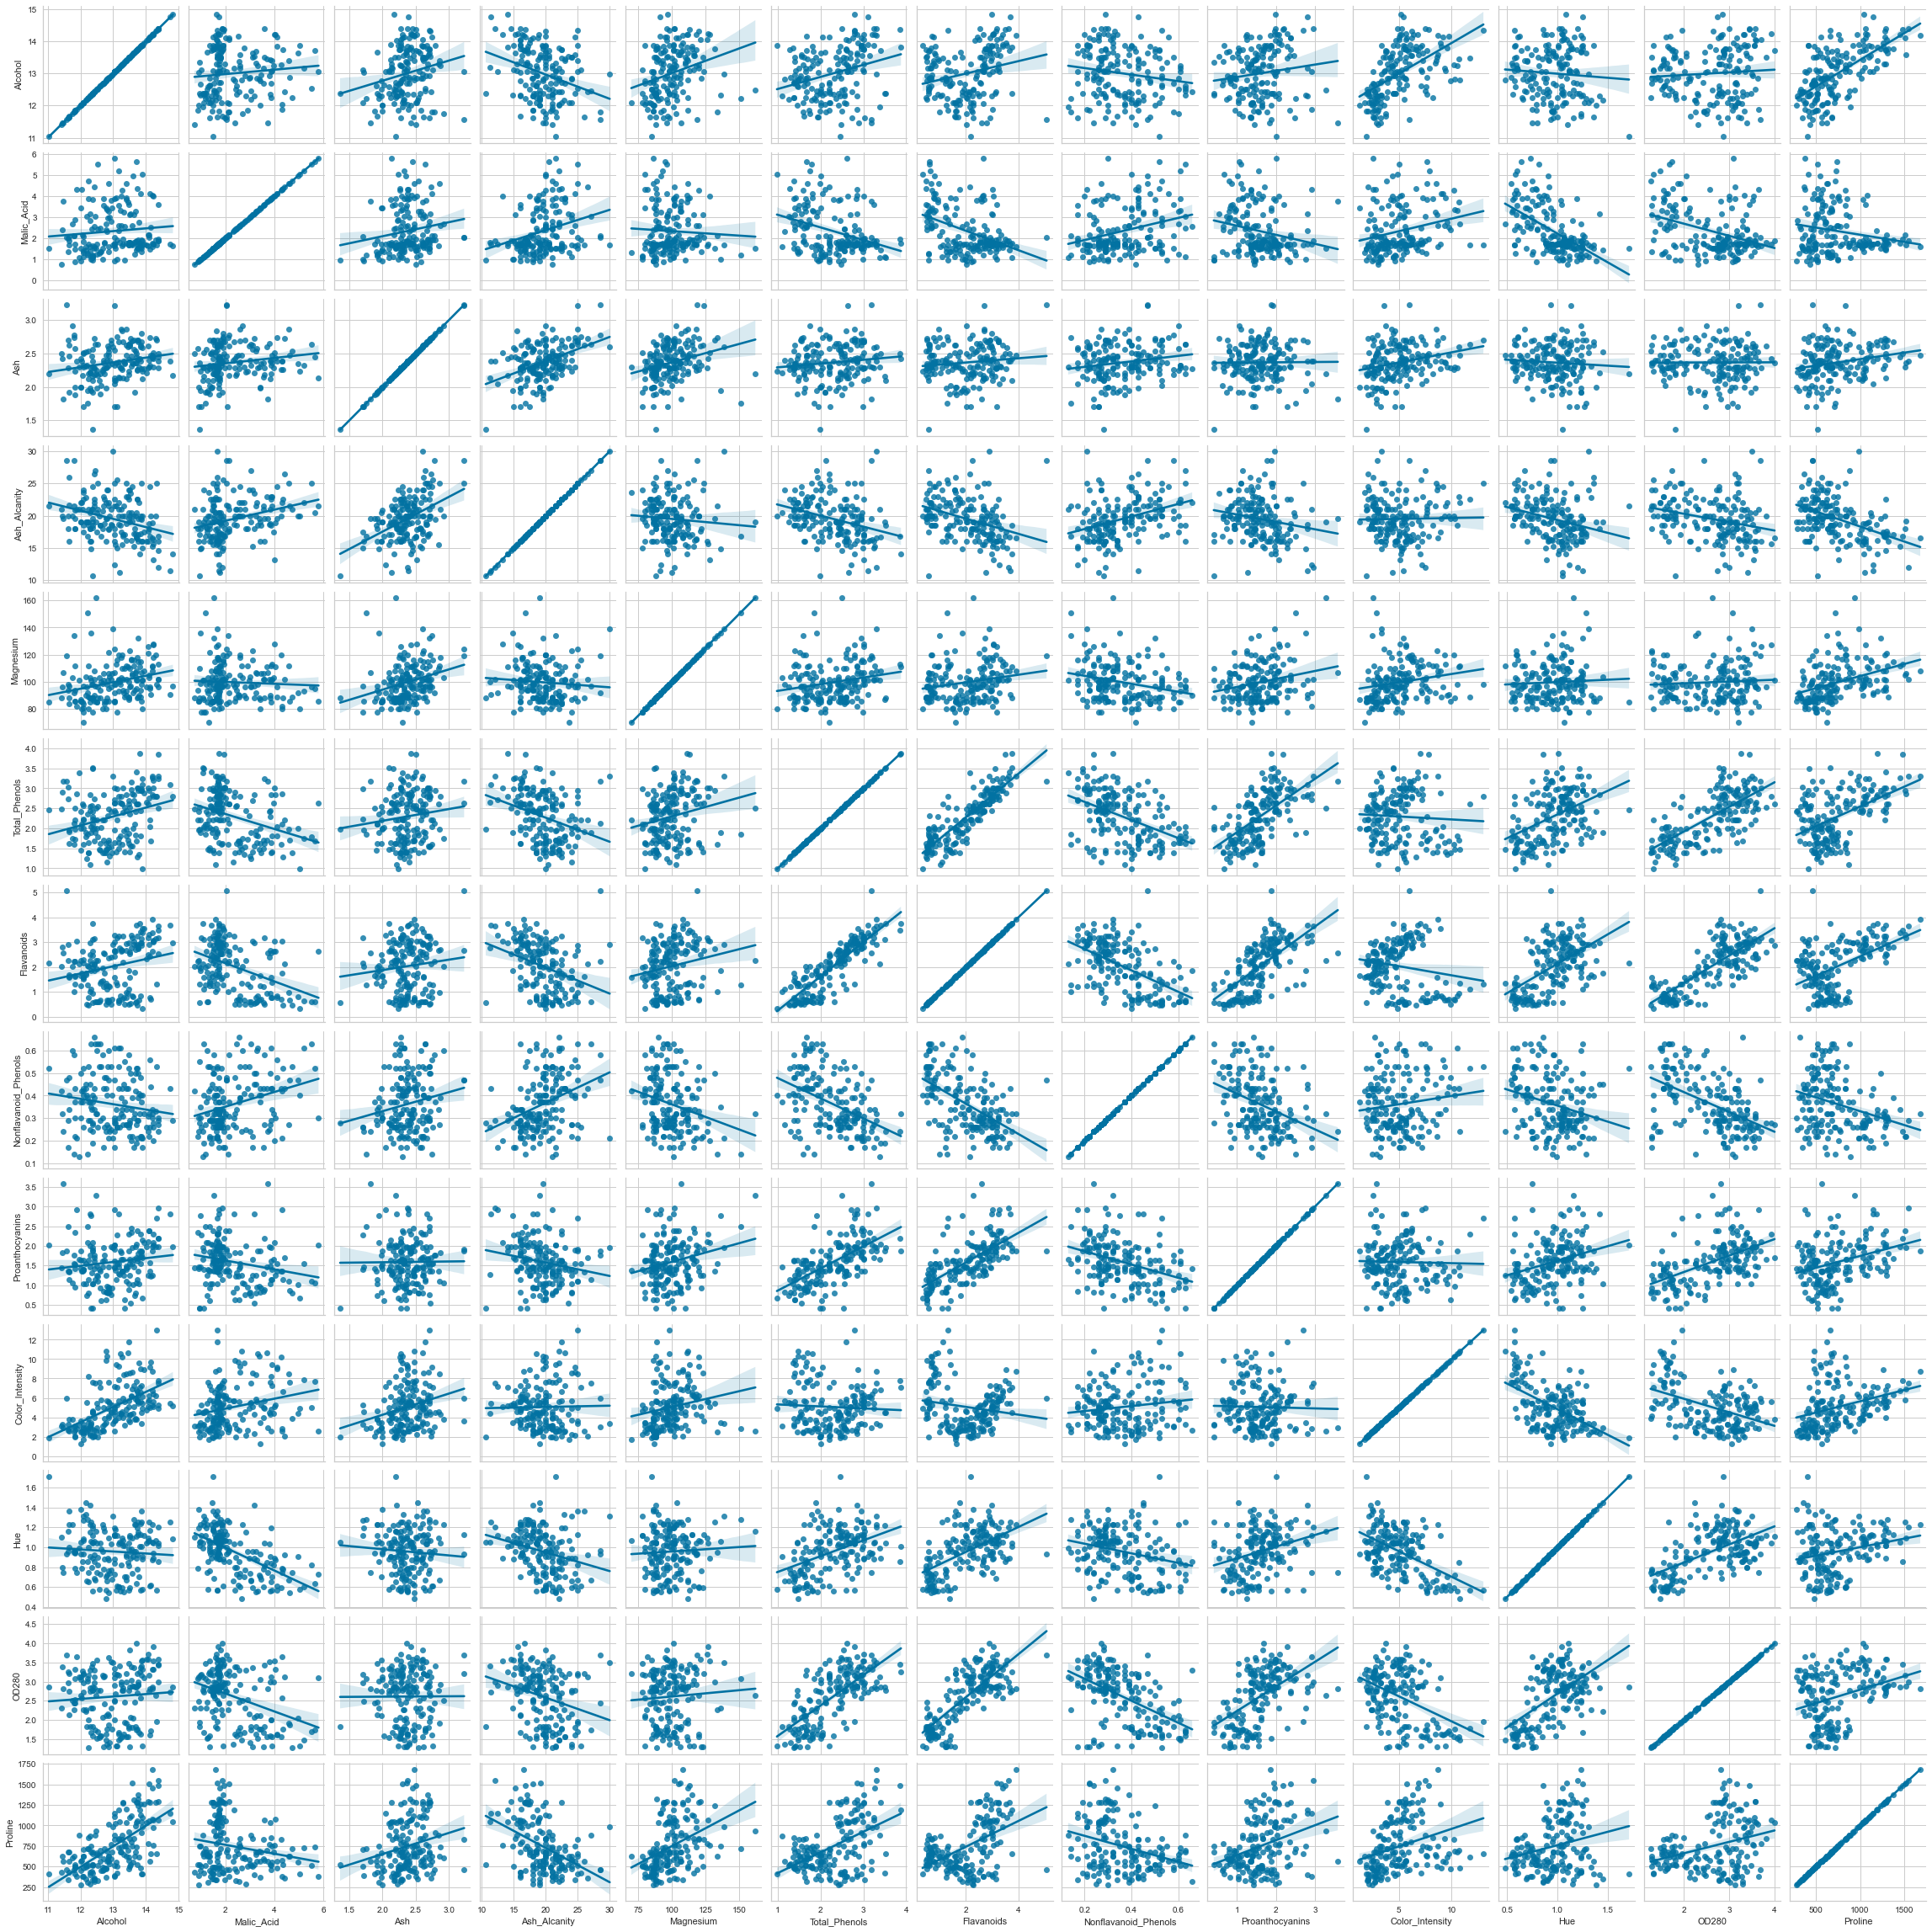

In [9]:
#Relationship between variables
sns.pairplot(df, kind='reg', diag_kind=None)
plt.show()

The Skewness Values
Alcohol :    -0.051482331077134784
Malic_Acid :    1.0396511925814442
Ash :    -0.17669931645735712
Ash_Alcanity :    0.21304688642645586
Magnesium :    1.098191054755161
Total_Phenols :    0.08663858640245253
Flavanoids :    0.02534355338149103
Nonflavanoid_Phenols :    0.4501513355621236
Proanthocyanins :    0.5171371722998975
Color_Intensity :    0.8685847909572548
Hue :    0.021091272199709302
OD280 :    -0.30728549895848106
Proline :    0.7678217813897322


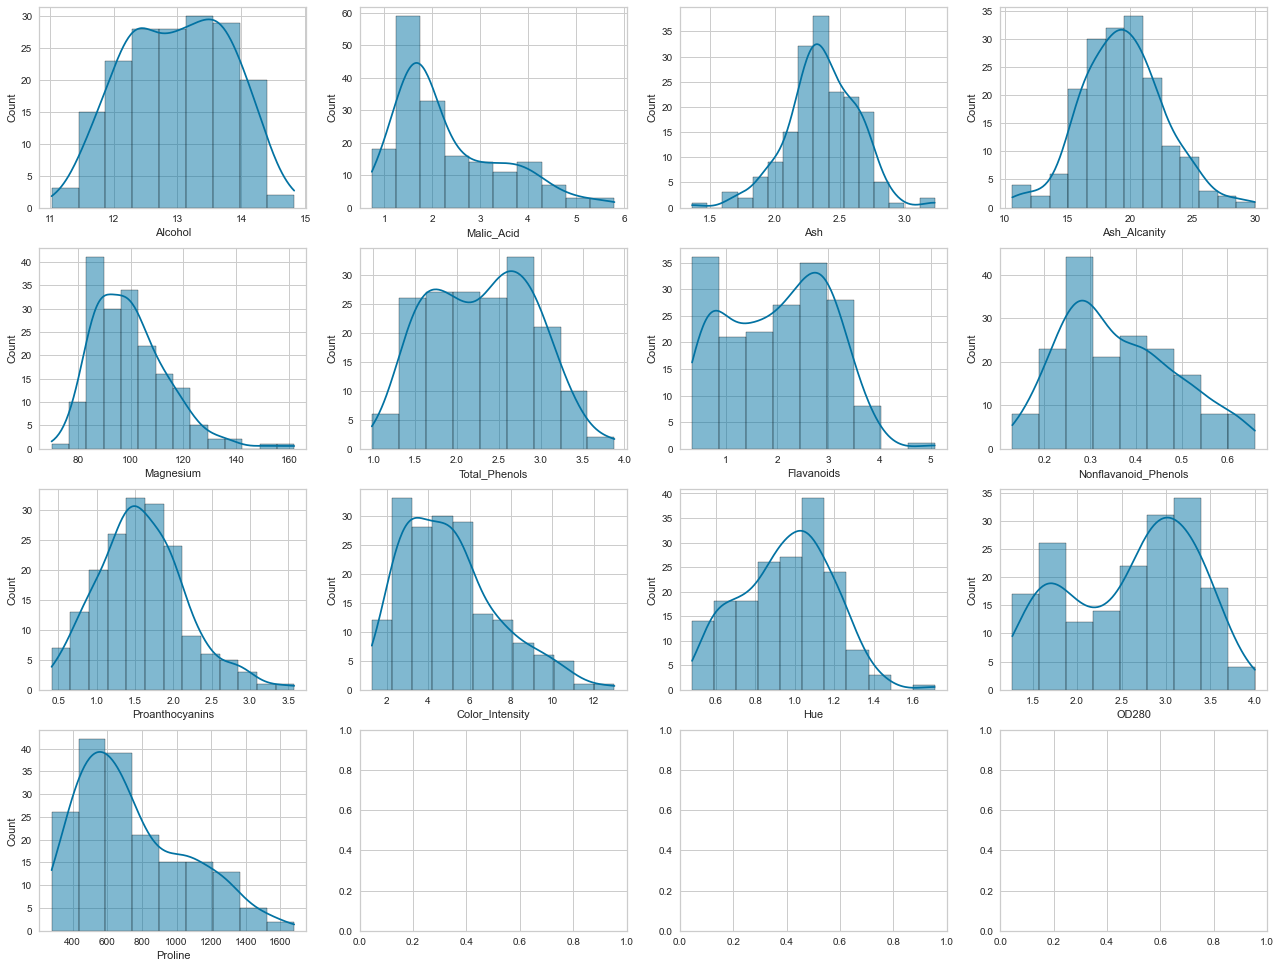

In [10]:
columns = list(df.columns)
fig, ax = plt.subplots(4, 4, figsize=(22,17))
j=0
print("The Skewness Values")
for i, col in enumerate(columns):
    print(f"{col} :    {df[col].skew()}")
    if i<4:
        sns.histplot(data=df, x=col, ax=ax[j, i], kde=True)
    elif i<8:
        sns.histplot(data=df, x=col, ax=ax[j+1, i-(j+4)], kde=True)
    elif i<12:
        sns.histplot(data=df, x=col, ax=ax[j+2, i-(j+8)], kde=True)
    else:
        sns.histplot(data=df, x=col, ax=ax[j+3, i-(j+12)], kde=True)

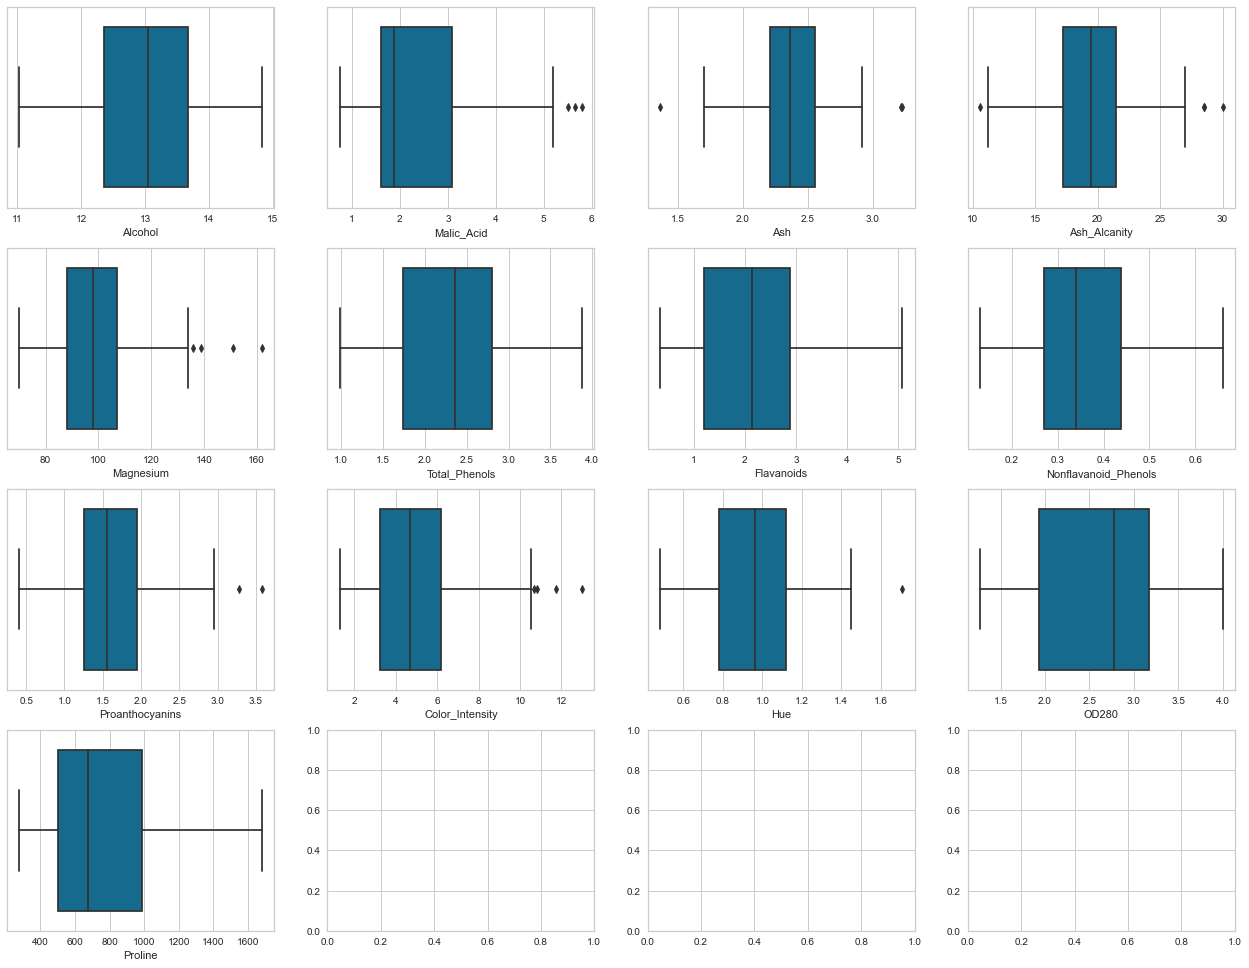

In [11]:
#Checking Outliers
columns = list(df.columns)
fig, ax = plt.subplots(4, 4, figsize=(22,17))
j=0
for i, col in enumerate(columns):
    if i<4:
        sns.boxplot(data=df, x=col, ax=ax[j, i])
    elif i<8:
        sns.boxplot(data=df, x=col, ax=ax[j+1, i-(j+4)])
    elif i<12:
        sns.boxplot(data=df, x=col, ax=ax[j+2, i-(j+8)])
    else:
        sns.boxplot(data=df, x=col, ax=ax[j+3, i-(j+12)])

In [12]:
#Handling Outliers and Skewness
columns = list(df.columns)
pt = PowerTransformer(method='yeo-johnson')
for col in columns:
    df[col]=pt.fit_transform(df[[col]])

The Skewness Values
Alcohol :    -0.02197429933765914
Malic_Acid :    0.0730070679202247
Ash :    0.043206228696649
Ash_Alcanity :    0.0165074146280674
Magnesium :    0.006539996954968212
Total_Phenols :    -0.036744488619990676
Flavanoids :    -0.10131578293523238
Nonflavanoid_Phenols :    0.03969136506833387
Proanthocyanins :    0.0005282216869565512
Color_Intensity :    0.009866218398881956
Hue :    -0.016492844779981135
OD280 :    -0.14059211451702147
Proline :    0.012217885898668335


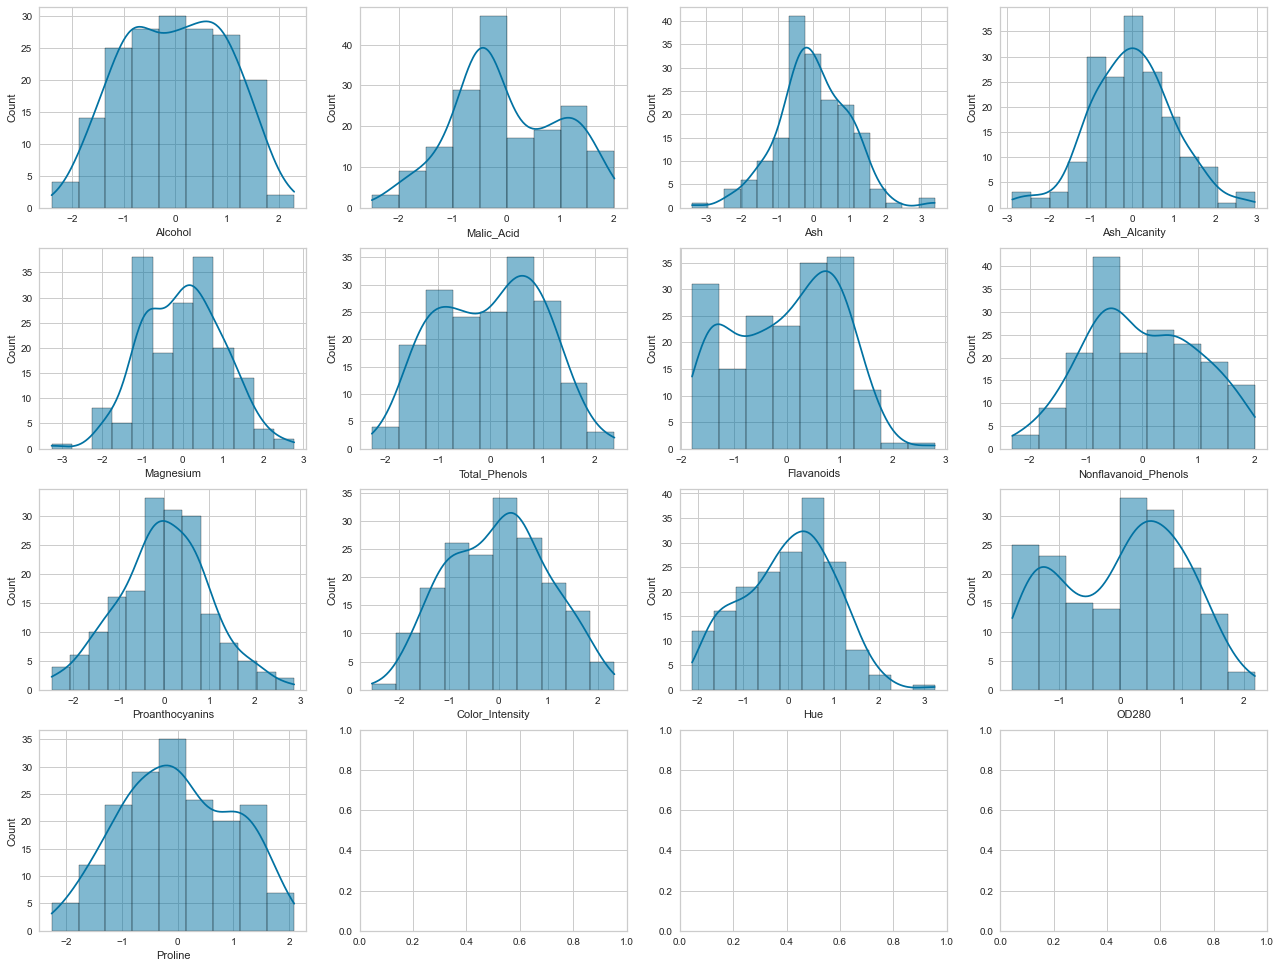

In [13]:
# After transformation
columns = list(df.columns)
fig, ax = plt.subplots(4, 4, figsize=(22,17))
j=0
print("The Skewness Values")
for i, col in enumerate(columns):
    print(f"{col} :    {df[col].skew()}")
    if i<4:
        sns.histplot(data=df, x=col, ax=ax[j, i], kde=True)
    elif i<8:
        sns.histplot(data=df, x=col, ax=ax[j+1, i-(j+4)], kde=True)
    elif i<12:
        sns.histplot(data=df, x=col, ax=ax[j+2, i-(j+8)], kde=True)
    else:
        sns.histplot(data=df, x=col, ax=ax[j+3, i-(j+12)], kde=True)

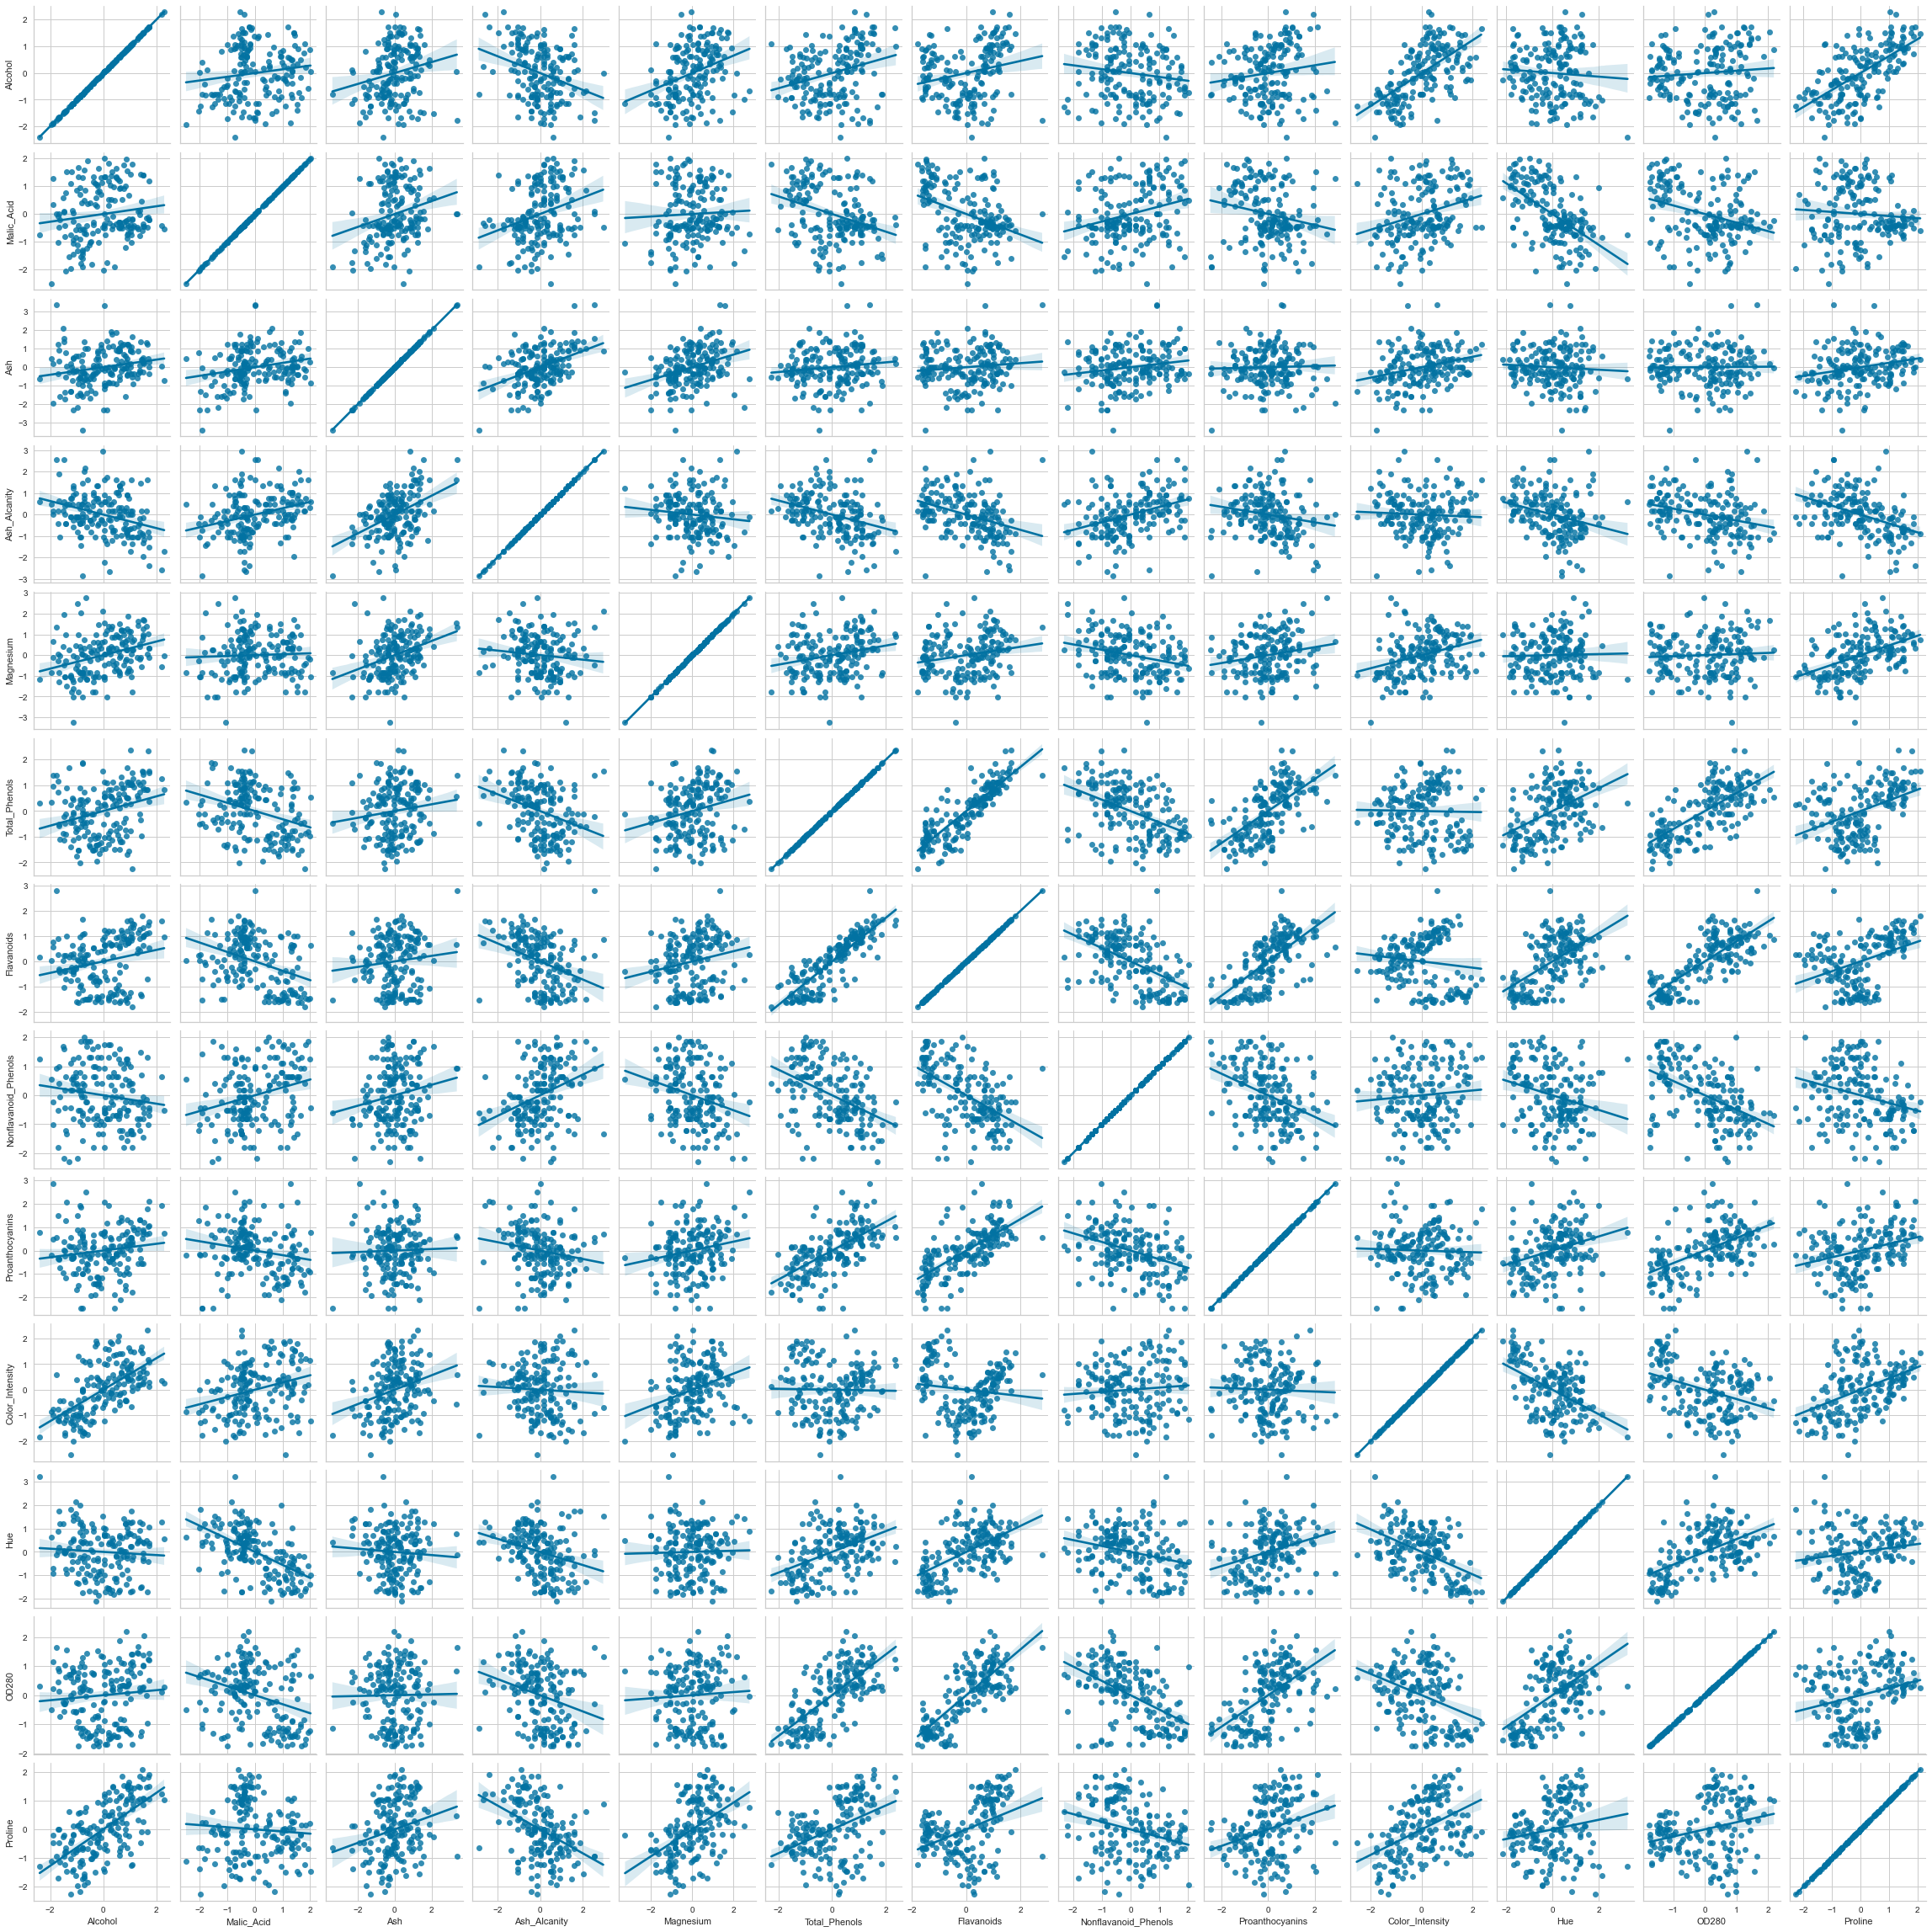

In [14]:
#Relationship between variables
sns.pairplot(df, kind='reg', diag_kind=None)
plt.show()

In [15]:
#Feature Scaling
sc = StandardScaler()
columns = list(df.columns)
for col in columns:
    df[col]=sc.fit_transform(df[[col]])
  
df

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.530388   -0.435463  0.210464     -1.180400   1.690749       0.819950   
1    0.238381   -0.338701 -0.839064     -2.663167   0.188126       0.591646   
2    0.188751    0.318077  1.119290     -0.243437   0.261461       0.819950   
3    1.708049   -0.121469  0.471827     -0.799464   1.020463       2.331036   
4    0.288052    0.523699  1.903702      0.472612   1.282104       0.819950   
..        ...         ...       ...           ...        ...            ...   
173  0.874761    1.971560  0.284824      0.325633  -0.206899      -0.983143   
174  0.487148    1.353424  0.396838      1.049949   0.333054      -0.777669   
175  0.325332    1.516324 -0.411341      0.177532   1.379377      -1.139573   
176  0.201155    0.523699 -0.011100      0.177532   1.379377      -1.035059   
177  1.403783    1.439809  1.391069      1.472657  -0.123889      -0.360140   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.027153             -0.609851         1.202701         0.451450   
1      0.747647             -0.806373        -0.490487        -0.110974   
2      1.192395             -0.421141         1.925646         0.467301   
3      1.419054             -1.011162         1.038972         1.182895   
4      0.681647              0.342097         0.471707        -0.141340   
..          ...                   ...              ...              ...   
173   -1.469686              1.242295        -0.931816         1.153680   
174   -1.308946              0.641775        -0.244461         1.032950   
175   -1.377430              0.641775        -0.356749         1.790358   
176   -1.388902              1.303401        -0.152471         1.581288   
177   -1.297589              1.480646        -0.356749         1.556806   

          Hue     OD280   Proline  
0    0.368811  2.037232  1.062541  
1    0.412391  1.150327  1.029743  
2    0.325202  0.779080  1.307868  
3   -0.420745  1.232761  1.810007  
4    0.368811  0.405810  0.188985  
..        ...       ...       ...  
173 -1.400065 -1.221001  0.205257  
174 -1.131304 -1.432767  0.237441  
175 -1.625052 -1.432767  0.493246  
176 -1.579979 -1.363232  0.507388  
177 -1.534944 -1.386528 -0.473166  

[178 rows x 13 columns]

In [16]:
pca = PCA(n_components = 2)
df = pca.fit_transform(df)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.35092919, 0.21004172])

## K-means 

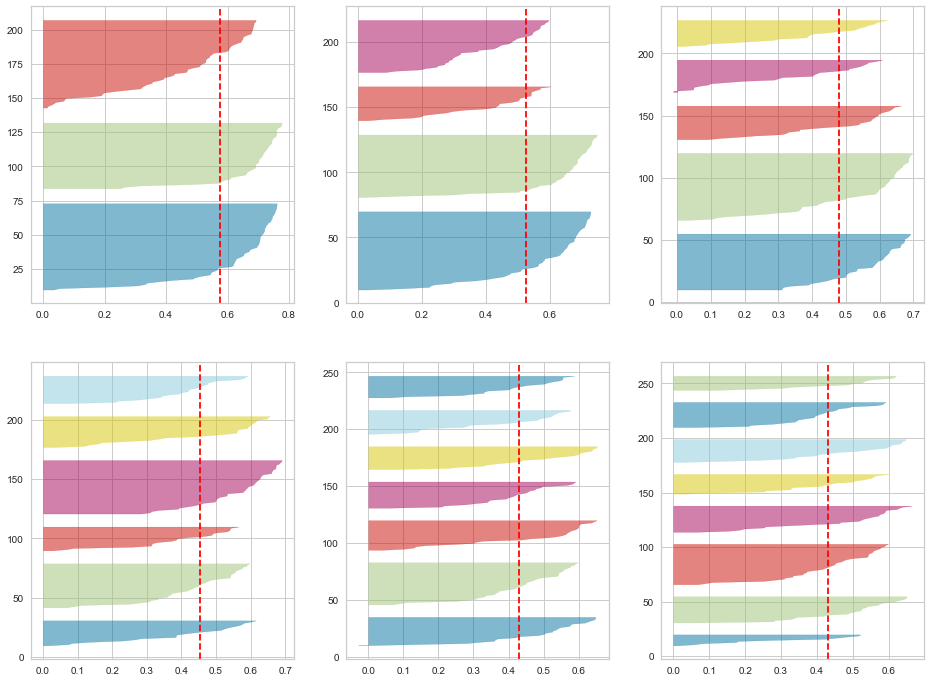

In [17]:
#Choosing Optimum number of clusters
fig, ax = plt.subplots(2, 3, figsize=(16,12))
for i in list(range(3,9)):
    kmeans = KMeans(n_clusters=i)
    q, mod = divmod(i, 3)
    visualizer= SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1, mod])
    visualizer.fit(df) 

In [18]:
df = pd.DataFrame(df)

In [19]:
kmeans = KMeans(n_clusters=3).fit(df.iloc[:,0:2])

In [20]:
df['labels_kmeans'] = kmeans.labels_

In [21]:
# Calculate Silhoutte Score (Used to calculate the goodness of the clustering technique)

from sklearn.metrics import silhouette_score
score = silhouette_score(df, kmeans.labels_, metric='euclidean')
score # the value is close to 1 which inturn denotes that the point are very well settled in the clusters and are far apart from other clusters

0.6197386434933593

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warning

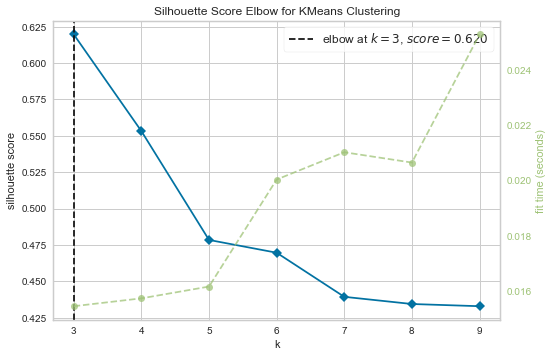

In [22]:
kmeans = KMeans()
kviz = KElbowVisualizer(kmeans, k=(3,10), metric='silhouette')
kviz.fit(df)
kviz.show()
plt.show()

<AxesSubplot:xlabel='0', ylabel='1'>

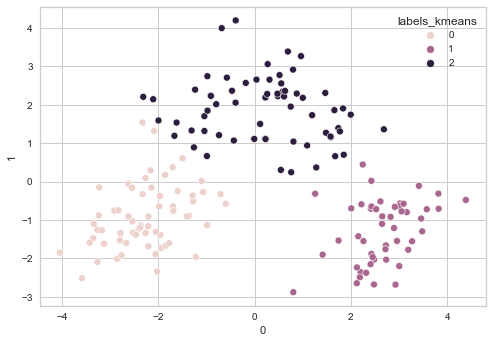

In [23]:
sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue='labels_kmeans')

## Dbscan

In [29]:
db = DBSCAN(eps=0.5, min_samples=5).fit(df.iloc[:,0:2])
df['labels_dbscan'] = db.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

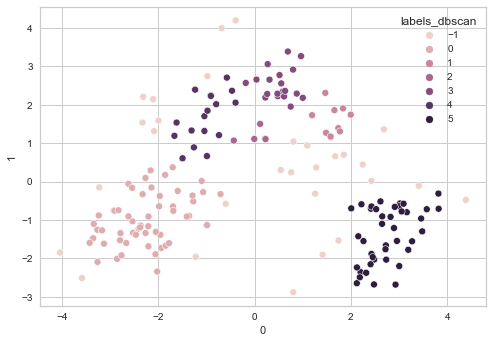

In [30]:
sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue='labels_dbscan')

## Hierarchical Clustering

In [31]:
ac = AgglomerativeClustering().fit(df.iloc[:,0:2])
df['labels_agglomerative_clustering'] = ac.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

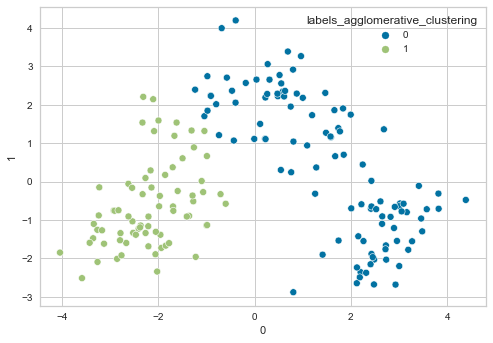

In [32]:
sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue='labels_agglomerative_clustering')

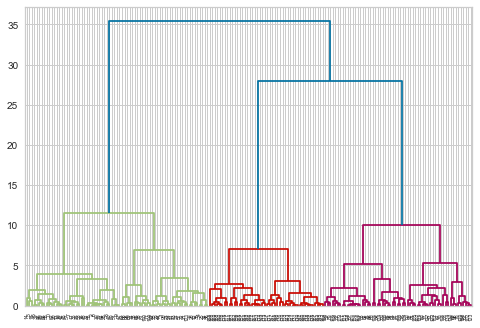

In [33]:
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:,0:2], method = 'ward'))